<a href="https://colab.research.google.com/github/Teo-Papas/Machine-Learning-2nd-semester/blob/main/Copy_of_02_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First let's load some data to play around with. We'll be examining a composite dataset created from multiple ice core samples in Antarctica, which includes estimates of temperature and carbon concentration over the past 800000 years.

The original raw data, a detailed description, relevant papers and other datasets like it can be found at the [NOAA website](https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-co2-2008.txt)

In [1]:
# library for downloading files from google drive.
%pip install gdown

!gdown https://drive.google.com/uc?id=1rh-mSmITFxv3687O-3COUkJqe27TcDtz

Downloading...
From: https://drive.google.com/uc?id=1rh-mSmITFxv3687O-3COUkJqe27TcDtz
To: c:\Users\papas\Documents\GitHub\Machine-Learning-2nd-semester\yct.npy

  0%|          | 0.00/23.8k [00:00<?, ?B/s]
100%|██████████| 23.8k/23.8k [00:00<00:00, 13.2MB/s]


In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# load the data from disk
with open('yct.npy', 'rb') as f:
    # the "with" keyword causes the file to be closed automatically after the indented code finished
    # an error in the indented code will also close the file
    yct = np.load(f)
    columns = np.load(f)

Now check what's in the two variables we loaded from disk.

In [4]:
# check what we loaded
print(yct.shape)
print(columns)

(963, 3)
['year' 'CO2 (ppmmv) difference from 1871'
 'temperature (C) difference from 1871']


We can retrieve the element `yct[i, j]` at row `i` and column `j`.

Describe in words what `i` and `j` mean.

`i` is describing how many rows of papameters we have.
`j` is describing how many observations we have.

Now plot the c02 level and temperature (differences from 1871) as functions of time. Label the axes and use a legend as appropriate.

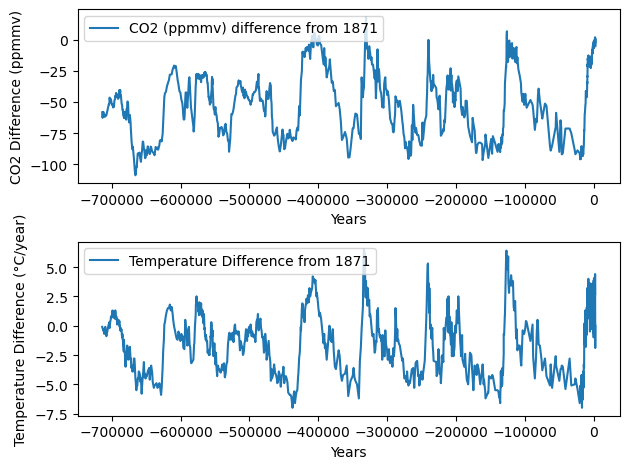

In [5]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(nrows=2)

axs[0].plot(yct[:,0], yct[:,1], label='CO2 (ppmmv) difference from 1871')
axs[0].set_ylabel('CO2 Difference (ppmmv)')
axs[0].set_xlabel('Years')

axs[1].plot(yct[:,0], yct[:,2], label='Temperature Difference from 1871')
axs[1].set_ylabel('Temperature Difference (°C/year)')
axs[1].set_xlabel('Years')

axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()

Describe the graph in words. What do you notice?

Both of the graphs have seasonality in their dataset. They are different parameters.

Next, do a scatter plot (look up how to do this if needed) comparing C02 concentration (x-axis) vs. temperature (y-axis).

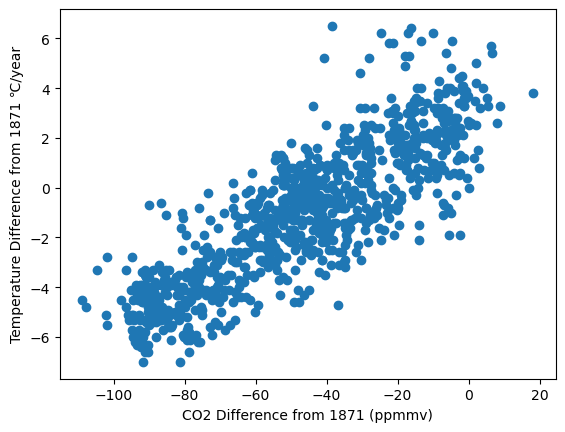

In [6]:
plt.scatter(yct[:,1],yct[:,2])
plt.ylabel('Temperature Difference from 1871 ℃/year')
plt.xlabel('CO2 Difference from 1871 (ppmmv)')
plt.show()

Next, complete the formula for our simple, 1-input-1-output least squares objective from the lecture, using latex inside a markdown cell (check documentation as needed on how to do this). Note that you are being asked to write the definition of the loss/objective function, not to minimize it (so far).

We consider the case with one input $x$ (C02 concentration) and one output $y$ (temperature), and no y-intercept. $i$ is an index over data points.

$$\ell(\beta, x, y)= \sum_i (...)$$

**Important:** Make sure you divide both $x$ and $y$ by their means before fitting the linear regression models below. Store these means so you can convert back to original units later. This normalization allows us to use the same learning rates on different problems.

Calculate the least squares objective for values of the slope $\beta$ from 0 to 2.5 in increments of 0.01. Plot $\ell$ as a function of $\beta$ while summing over the full dataset

In [7]:
x=yct[:,1].reshape(len(yct[:,1]), 1)
x_norm=yct[:,1]/np.mean(yct[:,1])
x_col = x_norm.reshape(len(yct[:,1]), 1)
x_mean=np.mean(yct[:,1])
y=yct[:,2].reshape(len(yct[:,2]), 1)
y_norm=yct[:,2]/np.mean(yct[:,2])
y_col = y_norm.reshape(len(yct[:,2]), 1)
y_mean=np.mean(yct[:,2])

def loss_func(beta,y_col,x_col):
  yhatfit=np.sum(np.multiply(x_col,beta))
  return np.mean((y_col-yhatfit)**2)

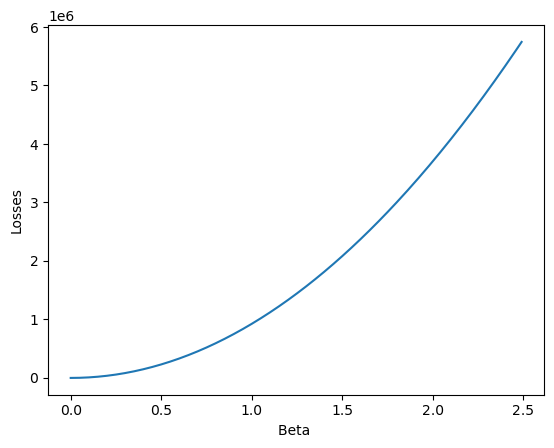

In [8]:
betas=np.arange(0,2.5,0.01)
loses=[]
for beta in betas:
  loses.append(loss_func(beta,y_norm,x_norm))
plt.plot(betas,loses)
plt.ylabel('Losses')
plt.xlabel('Beta ')
plt.show()

Use the formula from the lecture to find the $\beta$  that minimizes $\ell$ in closed form, and print out the answer.

In [9]:
C1=np.dot(x_col.T, x_col)
C2=np.linalg.inv(np.dot(x_col.T, x_col))
beta=np.dot(np.dot(np.linalg.inv(np.dot(x_col.T,x_col)),x_col.T),y_col)
print(beta)

[[1.75381807]]


What is the value of $\beta$ if we reverse the normalization of $x$, $y$ and go back to the original units of our data?

In [10]:
betaorig=np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
print(betaorig)

[[0.03760254]]


Now let's define a function that calculates

> Indented block


$$g = \frac{1}{P} \sum_i \frac{d\ell(\beta, x_i, y_i)}{d\beta}$$
while summing over all data points (no batching).
* First write a function that does this using a `for` loop over the data points indexed by `i`

In [27]:
# type code here
def g_gradwithfor(beta,xi,yi):
  yhatfit=[xi[i]*beta for i in range(len(xi)-1)]
  dldb=[];
  for i in range(len(xi)-1):
    dldb.append(2*(yi[i]-yhatfit[i])*(-1*xi[i]))
  return np.mean(dldb),dldb

* Next, use numpy arrays, and use mathematical operations on arrays to avoid writing any `for` loops

In [29]:
# type code here
def g_gradwithout(beta,x,y):
    n_points = y.shape[0]
    n_inputs = int(np.prod(x.shape[1:]))
    x = x.reshape(n_points, n_inputs)
    beta = np.array(beta).reshape(n_inputs, 1)
    y = y.reshape(n_points, 1)
    beta = np.array(beta).reshape(n_inputs, 1)
    g_eachpoint = -2.0 * (y - np.dot(x, beta)).reshape(n_points, 1) * x.reshape(n_points, n_inputs) / n_points
    return np.sum(g_eachpoint, axis=0)


Now implement the gradient descent algorithm from the lecture
* Initialize $\beta$ to be zero before any updates.
* First try a learning rate of $\lambda = 1e-4$, but feel free to change it if that gives you better results
* Keep track of $\sum_i \ell$ as $\beta$ is repeatedly updated
* Keep track of the history of $\beta$ values as it is updated.

After updates are finished:

* Plot a $\ell$ as a function of the number of $\beta$ updates, and determine how many updates are needed before $\ell$ no longer reduces. This graph shows a **training curve**
* Plot $\beta$'s value after each update
* Plot the model fit $y \approx \beta x$ after convergence

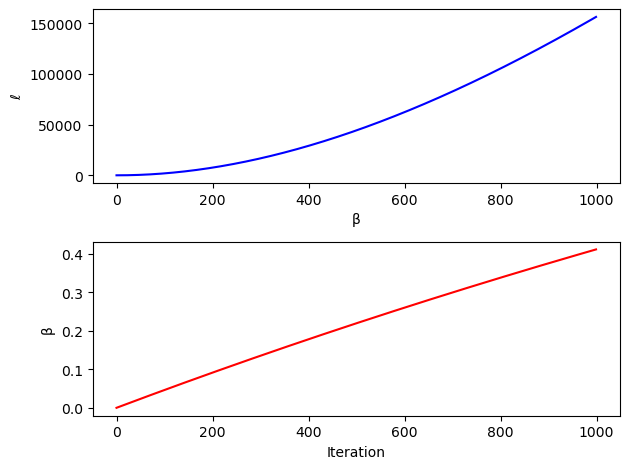

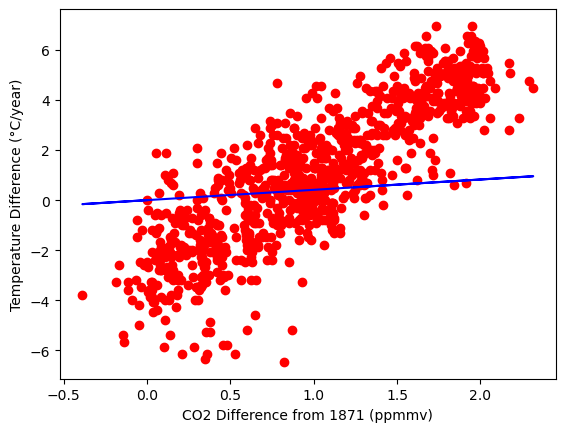

[0.4118852623987694]
Closed Form β:  [[0.03760254]] Gradient Descent β: [0.4118852623987694]


In [30]:
# note: you can't use lambda as a variable name, since it has a special meaning in python
def initialize_weights(X):
    """Initialize weights and bias to zero."""
    num_features = int(np.prod(X.shape[1:]))
    w = np.zeros(num_features)
    return w

def compute_gradients(X, y, w):
    """Compute gradients of cost function with respect to weights and bias."""
    delta=loss_func(w,y,X)
    gradient_w= g_gradwithout(w,X,y)
    return delta,gradient_w

def gradient_descent(X, y, learning_rate, num_iterations):
    """Perform gradient descent to learn weights and bias."""
    w = initialize_weights(X)
    costs=[]
    betas=[]
    for _ in range(num_iterations):
        delta,gradient_w = compute_gradients(X, y, w)
        costs.append(delta)
        w -= learning_rate * gradient_w
        betas.append(w.tolist())
    fig,axs=plt.subplots(nrows=2)
    axs[0].plot(costs,color='blue',label='ℓoss Function')
    axs[0].set_ylabel('ℓ')
    axs[0].set_xlabel('β')
    axs[1].plot(betas,color='red',label='ℓoss Function')
    axs[1].set_ylabel('β')
    axs[1].set_xlabel('Iteration')
    plt.tight_layout()
    plt.show()
    plt.scatter(x_col,y_col,color='red')
    plt.plot(x_col,x_norm*betas[-1],color='blue',label='fitted curve')
    plt.ylabel('Temperature Difference (°C/year)')
    plt.xlabel('CO2 Difference from 1871 (ppmmv)')
    plt.show()
    return costs,betas
learning_rate = 1e-4
num_iterations = 1000
costs,betas = gradient_descent(x_col, y_col, learning_rate, num_iterations)
print(betas[-1])

print('Closed Form β: ',betaorig,'Gradient Descent β:',betas[-1])

How closely does the $\beta$ value estimated in this way match the closed form solution above?

Very Close 

See what happens when you using a different learning rate. What happens when it gets too high or too low?

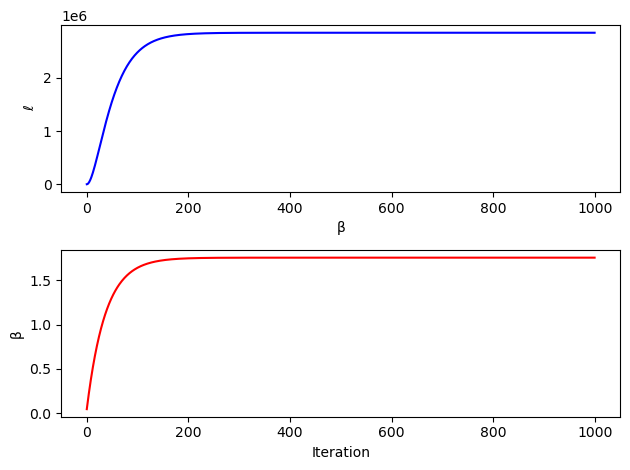

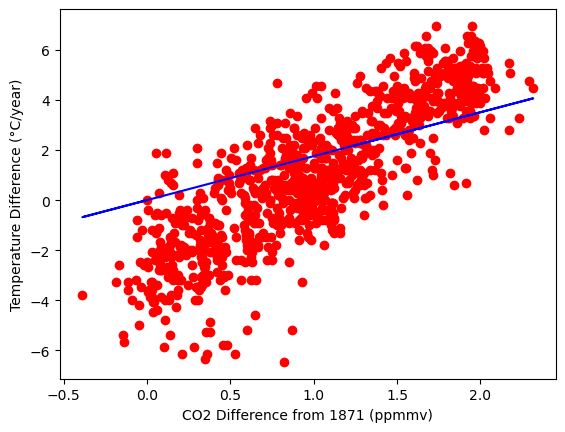

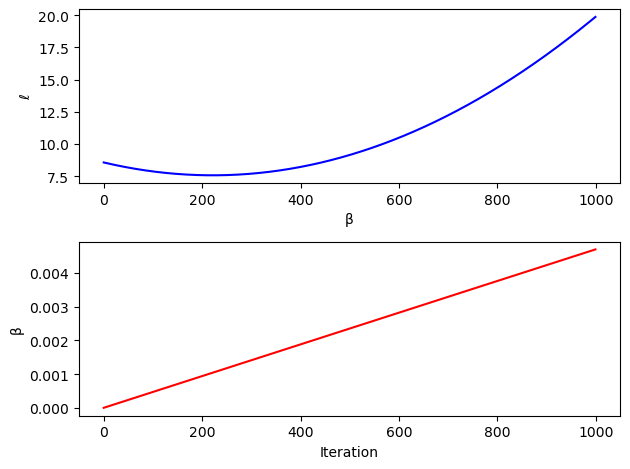

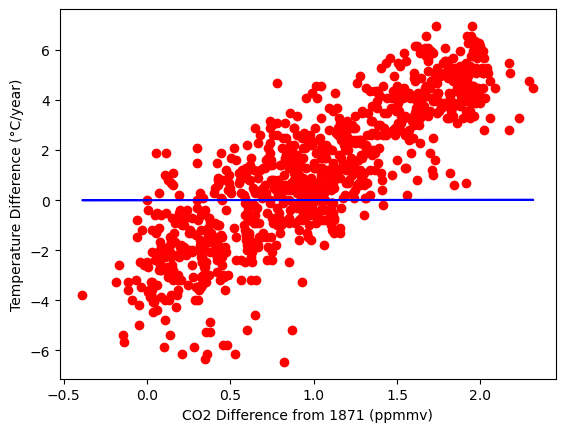

In [31]:
#type code here
learning_rate = 1e-2
num_iterations = 1000
learning_rate1 = 1e-6
costs,betas= gradient_descent(x_col, y_col, learning_rate, num_iterations)
costs,betas= gradient_descent(x_col, y_col, learning_rate1, num_iterations)

For a too-high learning rate, the solution diverges and the loss increases towards infinity. We aren't minimzing the loss but increasing it.

For a too-low learning rate, learning is very slow and we don't minimize the loss effectively in a reasonable number of iterations.

Now we'll include a constant term in the regression, by adding a second column of ones to the input $x$

* Build $x$ as a 2D array in numpy, with two columns, and in the second column assign every value to be 1.
* Check that the size of $x$ is correct, and print out a few values to be sure.

In [32]:
#type code here
x, y = yct[:, 1] / np.mean(yct[:,1]), yct[:, 2] / np.mean(yct[:,2])
x2 = np.stack((x, np.ones_like(x)), axis=1)
print('x2.shape: ', x2.shape)
print('x[:3]: ', x[:3])
print('x2[:3]:\n', x2[:3])

x2.shape:  (963, 2)
x[:3]:  [1.24159413 1.33529935 1.25011279]
x2[:3]:
 [[1.24159413 1.        ]
 [1.33529935 1.        ]
 [1.25011279 1.        ]]


Now implement the closed-form formula for regression with multiple inputs from the lecture, and use it to calculate the two elements of $\beta$.

In [33]:
#type code here
betahat = np.dot(np.linalg.inv(np.dot(x2.T, x2)), np.dot(x2.T, y))
print(betahat)

[ 3.9824543 -2.9824543]


What are the physical units of each element of $\beta$ (if we reverse the normalization of $x,y$)?

beta[0] has units deg. / ppmv C02. beta[1] has units deg.(type answer)

Now try to implement stochastic gradient descent as described in the lecture, with minibatches of size 9. Include a column of 1's so that $x$ has two columns, and there are two inputs or each data point.

You may find that the optimal learning rate is different in this case. Since each update of $\beta$ now involves far fewer data points, you may also have to do a great number of total updates to reach convergence.
* Plot the training curve
* Describe how this curve may be different than gradient descent on the full dataset. Any idea why?

epoch: 0 indexes: 0
Costs:  7.1443407316659915
W_curve:  [0.061613664829417616, 0.032889118102114485]
epoch: 0 indexes: 1
Costs:  6.048194151344047
W_curve:  [0.12087002874907093, 0.07393864989113713]
epoch: 0 indexes: 2
Costs:  10.207270817784616
W_curve:  [0.1357888929810268, 0.061464384237057204]
epoch: 0 indexes: 3
Costs:  10.899940721604704
W_curve:  [0.19544459293705968, 0.08104803141946598]
epoch: 0 indexes: 4
Costs:  4.332674526926359
W_curve:  [0.25067201536725037, 0.11596697251210955]
epoch: 0 indexes: 5
Costs:  5.81106258593515
W_curve:  [0.2866631307587884, 0.14420445391287348]
epoch: 0 indexes: 6
Costs:  16.81938289132539
W_curve:  [0.2889383143700426, 0.12415608560269575]
epoch: 0 indexes: 7
Costs:  11.968149632759044
W_curve:  [0.30898479077261004, 0.1272430406342249]
epoch: 0 indexes: 8
Costs:  11.553801020460732
W_curve:  [0.3655424799395039, 0.1589106192200367]
epoch: 0 indexes: 9
Costs:  17.46115018449474
W_curve:  [0.42147464062433226, 0.18835851903115605]
epoch: 0 

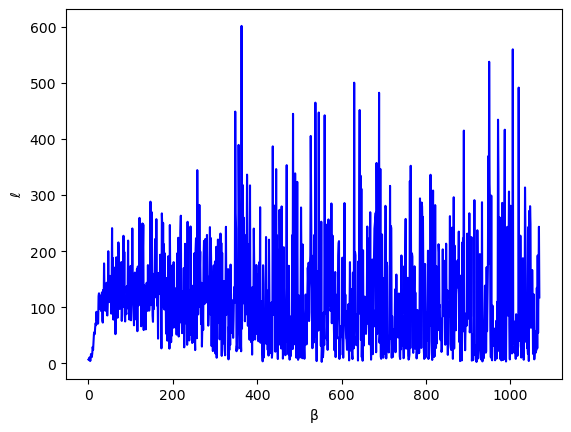

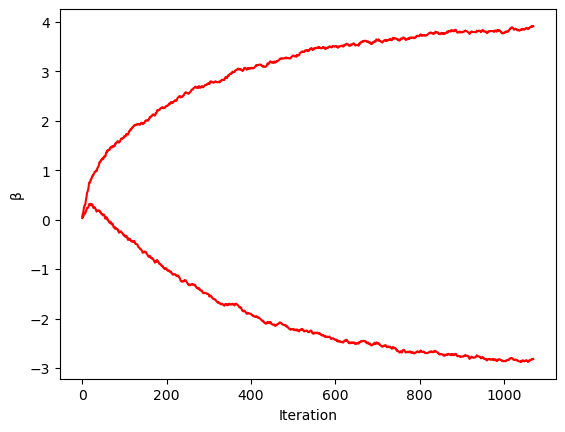

In [34]:
#type code here
def SGD(X, y, learning_rate, epochs, batch_size):
    w = initialize_weights(X)
    m = len(y)
    costs=[]
    W_curve=[]
    for epoch in range(epochs):
        n_batches=int(np.ceil(m / batch_size))
        indices = np.random.permutation(m)
        for i in range(n_batches):
            s=batch_size * i
            e=np.minimum(batch_size * (i + 1), m - 1)
            ii=indices[s:e]
            X_i = X[ii]
            y_i = y[ii]
            delta,grad=compute_gradients(X_i, y_i, w)
            costs.append(delta.tolist())
            print('epoch:',epoch,'indexes:',i)
            print('Costs: ',costs[i])
            w = w - learning_rate * grad
            W_curve.append(w.tolist())
            print('W_curve: ',W_curve[i])
        

    return w,W_curve,costs

X1=x2
sorted_w,sorted_W_curve,sorted_costs=SGD(X1, y, 0.01, 10,9)
plt.plot(sorted_costs,color='blue',label='ℓoss Function')
plt.ylabel('ℓ')
plt.xlabel('β')
plt.show()
plt.plot(sorted_W_curve,color='red',label='ℓoss Function')
plt.ylabel('β')
plt.xlabel('Iteration')
plt.show()

(Type answer here)

## Intro to PyTorch and automatic differentiation

Next we're going to get used to PyTorch. PyTorch is very similar to NumPy in that it manipulates array with mathematical operations. But there are two key differences:

* PyTorch supports efficient GPU computation when the right hardware is available.
* PyTorch allows us to calculate the derivatives (also known as gradients) of the programs we write. That is, if we define a function $f(x)$ for any input $x$ in PyTorch, we can use PyTorch library functions to calculate $\frac{d f(x)}{dx}$.

Let's try this with the simple function $f(x) = x^2$.

In [35]:
def f(x):
    return x * x

We'll use numpy to calculate $f(x)$ for $x = 0, 1, 2, 3, 4, 5$.

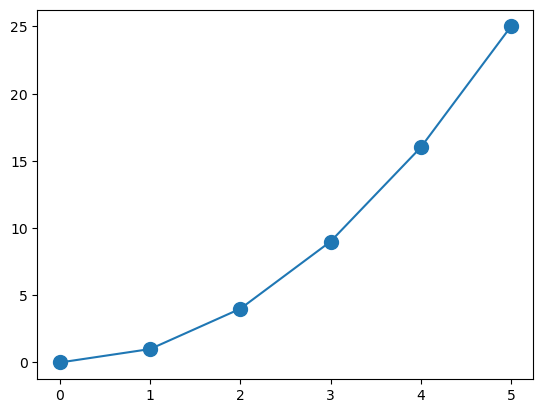

In [36]:
x = np.array([0, 1, 2, 3, 4, 5], dtype=float)

y = f(x)

plt.plot(x, y, '.-', markersize=20)

Now we'll use PyTorch to do the same calculation.

First, note that arrays in pytorch are called "tensors."

In [37]:
import torch
x_t = torch.tensor(x)  # convert from numpy to pytorch

y_t = f(x_t)

Note that we didn't have to change our function $f$ to work on PyTorch tensors instead of numpy arrays or simple Python numbers. For this very simple function, all that happens is that we use the multiplication operator `*` and return a value. Since this operator supports numpy arrays, pytorch tensors and simple numeric variables in python, we can use any of these as an input.

If we needed separate code depending on the kind of object $x$ is, we could check and use `if` statements accordingly.

### Automatic differentiation

We know from basic differential calculus that when $f(x) = x^2$, then $\frac{d f(x)}{dx} = 2x$. Let's use PyTorch to do the same calculation. There are two concepts we'll need to implement this:
* `requires_grad` is a flag we can set to true on any torch array, to tell PyTorch that we want to calculate derivatives with respect to this array. Essentially, by setting `x.requires_grad = True` we are saying that $x$ will be in the denominator of some $\frac{dy}{dx}$ that we want to calculate.
* The `.backward()` method calculates the derivatives (gradients) of a scalar $s$ (a single real value) in PyTorch with respect to all arrays $x$ with `requires_grad == True` that was used somewhere in the calculation of $s$. The resulting derivatives $\frac{ds}{dx}$ will be stored in `x.grad`for all the arrays on which $s$ directly or indirectly depends.

However, we don't want $\frac{ds}{dx_i}$ for each element $x_i$ of $x$, we want $\frac{d f(x_i)}{dx_i}$ for each $i$.
To make the `.backward()` method do the calculation we want, we'll define $s = \sum_i f(x_i)$, so that $\frac{ds}{dx_i} = \frac{d f(x_i)}{dx_i}$.

Here "A depends on B" means that B was used in some calculations that were used to produce A. This includes indirect relations where C depends on B, and B depends on A.

If this seems confusing, just try it out and see! Read the comments on each line of code carefully, as they explain concepts we'll need later!

Text(0, 0.5, '$\\frac{d f(x)}{dx}$')

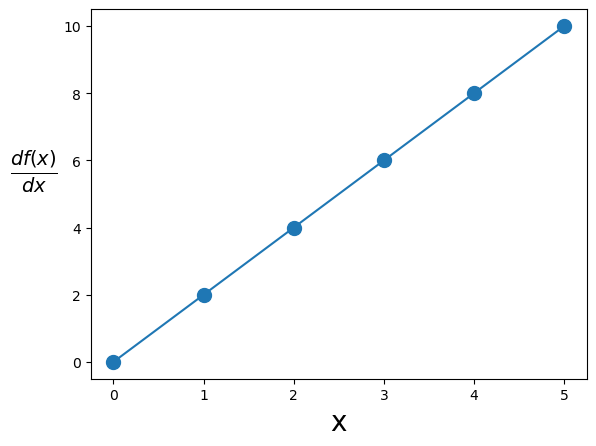

In [38]:
x_t = torch.tensor(x)  # convert from numpy to pytorch
x_t.requires_grad = True  # tell PyTorch we want to take derivatives of something with respect to this variable

y_t = f(x_t)  # calculate the function. this is the "forward step"
s = torch.sum(y_t)  # add up f(x) for all x
s.backward()  # calculate derivatives of s with respect to all variables it depends on that have requires_grad == True
g = x_t.grad  # store the calculated gradients. this is the "backward step"

g_np = g.detach().numpy()  # go back to numpy for plotting purposes

# plot using numpy arrays. plotting using pytorch arrays for which requires_grad == True will fail!
plt.plot(x, g_np, '.-', markersize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('$\\frac{d f(x)}{dx}$', fontsize=20, rotation=0, horizontalalignment='right')

Now try it yourself, using the same $x$ as before and implementing these relations and calculating the gradients $\frac{dw}{dz}$:

$$y = \sin(x)\\
z = y^2 \\
w = 1 - 3z\\
$$

* In the next code block, calculate $y, z, w$ and the gradients $\frac{dw}{dx}$. Plot everything as a function of $x$.
* Calculate gradients automatically using PyTorch
* Compare to by-hand calculations from previous exercises, and plot the results side-by-side

**Hint** You should be able to do this with a single call to `s.backward()` at the end of your calculations. **Warning:** if `s.backward()` is called twice, the corresponding `.grad` fields for the arrays used to compute `s` will have twice the correct value.

In [39]:
# calculate y,z,w in pytorch
x_t = torch.tensor(x,requires_grad = True) 

y_t = torch.sin(x_t)
z_t = y_t**2
w_t = 1-3*z_t
s= torch.sum(w_t)


# calculate gradients automatically
s.backward()
g = x_t.grad.detach().numpy()
print(g)

[-0.         -2.72789228  2.27040749  0.83824649 -2.96807474  1.63206333]


In [40]:
# calculate gradients automatically
dw_dz_hand = -6. * np.sin(x) * np.cos(x)
print(dw_dz_hand)

[-0.         -2.72789228  2.27040749  0.83824649 -2.96807474  1.63206333]


Text(0, 0.5, '$\\frac{dw}{dx}$')

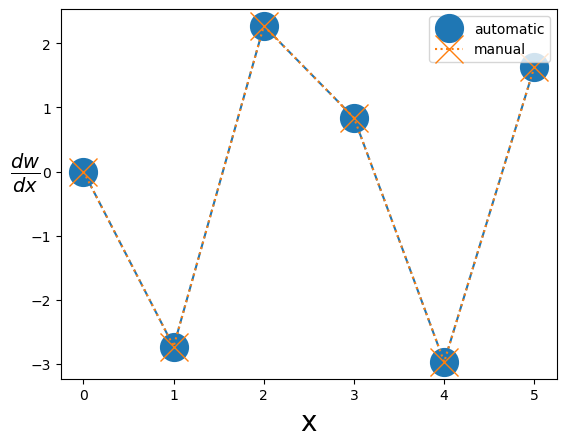

In [41]:
# calculate gradients using formula from last exercises
plt.plot(x, g, '--o', label='automatic', markersize=20)
plt.plot(x, dw_dz_hand, 'x:', label='manual', markersize=20)
plt.legend()
plt.xlabel('x', fontsize=20)
plt.ylabel('$\\frac{dw}{dx}$', fontsize=20, rotation=0)

In [ ]:
# compare results

Now use automatically calculated gradients to run a (stochastic) gradient descent loop. Make sure you wrap the beta updates in a `torch.no_grad()` block, since we don't want to differentiate the updates. We also need to reset the derivative information after each update. We'll explain how/why this works next week.

Plot the training curve, predictions, etc. as before

A rough outline of the code has been started below

In [44]:
x, y = yct[:, 1] / x_mean, yct[:, 2] / y_mean
x2 = np.stack((x, np.ones_like(x)), axis=1)
x, y = torch.tensor(x2, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
beta = torch.zeros((x.shape[1], 1), requires_grad=True, dtype=torch.float32)
y = y.reshape(-1, 1)
print(x.shape)
print(beta.shape)
print(torch.matmul(x,beta).shape)
print(y.shape)

torch.Size([963, 2])
torch.Size([2, 1])
torch.Size([963, 1])
torch.Size([963, 1])


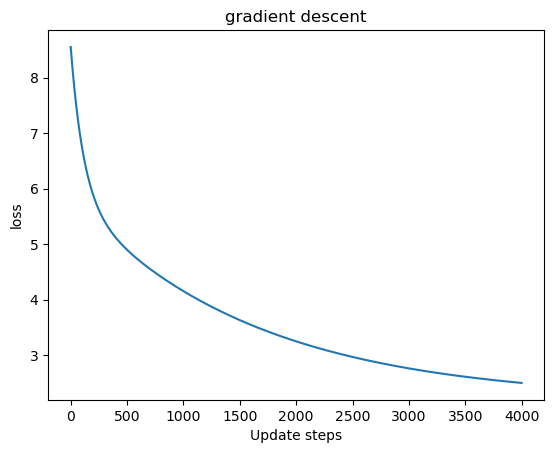

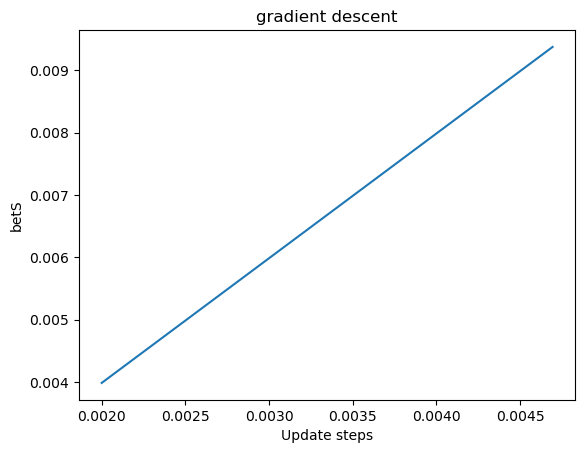

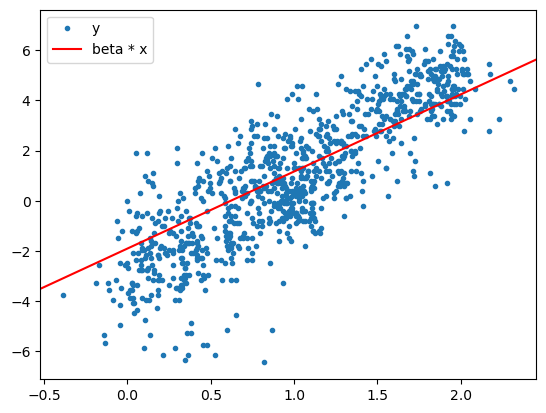

In [52]:

LR = 1e-3 # learning rate
n_upd=4000
def torch_grad_desc(x,y,LR,n_upd):
    loss_all=[]
    beta_curve=[]
    beta = torch.zeros((x.shape[1], 1), requires_grad=True, dtype=torch.float32)
    for i in range(n_upd):
        yhat = torch.matmul(x, beta)
        loss = ((y - yhat) ** 2).mean()
        loss.backward()
        with torch.no_grad():
            beta -= beta.grad * LR
            beta.grad.zero_()
            loss_all.append(loss.item())
            beta_curve.append(beta.tolist())
    return beta,loss_all,beta_curve
beta,loss_all,beta_curve=torch_grad_desc(x,y,LR,n_upd)        
plt.plot(loss_all)
plt.xlabel('Update steps')
plt.ylabel('loss')
plt.title('gradient descent')
plt.show()

plt.plot(beta_curve[0],beta_curve[1],)
plt.xlabel('Update steps')
plt.ylabel('betS')
plt.title('gradient descent')
plt.show()

plt.figure()
plt.plot(x[:,0].detach().numpy(), y.detach().numpy(), '.', label='y')

XL = np.array(plt.xlim())
plt.plot(XL, XL * beta[0].item() + beta[1].item(),'r',label='beta * x')
plt.xlim(XL)
plt.legend()
plt.show()

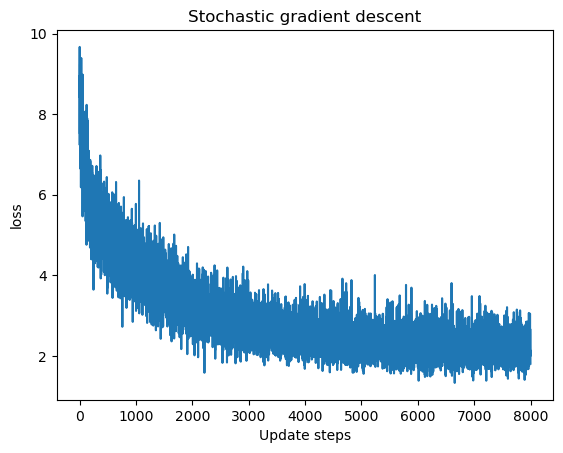

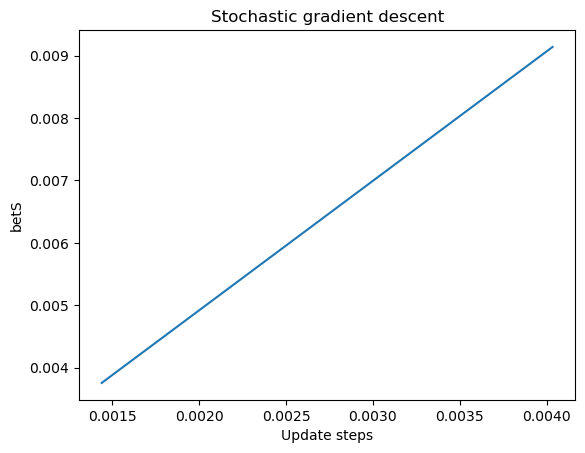

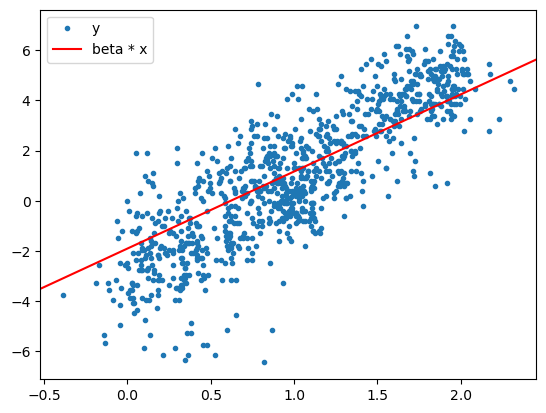

In [55]:
# stochastic gradient descent with batches

n_epochs = 1000
batch_size = 128

LR = 1e-3 # learning rate
def torch_stoch_grad_desc(X,y,LR,batch_size,n_epochs):
    n_points = len(y)
    loss_all = []
    beta_curve=[]
    n_batches = int(np.ceil(n_points / batch_size))
    beta = torch.zeros((x.shape[1], 1), requires_grad=True, dtype=torch.float32)
    
    for i in range(n_epochs):
        
        data_order = np.random.permutation(n_points)
        
        for b in range(n_batches):
            s = batch_size * b
            e = np.minimum(batch_size * (b + 1), n_points - 1)
    
            ii = data_order[s:e]
            x_batch = x[ii]
            y_batch = y[ii]
    
            yhat = torch.matmul(x_batch, beta)
            
            loss = ((y_batch - yhat) ** 2).mean()
            
            loss.backward()
            
            with torch.no_grad():
                beta -= beta.grad * LR
                beta.grad.zero_()
                loss_all.append(loss.item())
                beta_curve.append(beta.tolist())
    return beta,loss_all,beta_curve
beta1,loss_all1,beta_curve1=torch_stoch_grad_desc(x,y,LR,batch_size,n_epochs)   
plt.plot(loss_all1)
plt.xlabel('Update steps')
plt.ylabel('loss')
plt.title('Stochastic gradient descent')
plt.show()

plt.plot(beta_curve1[0],beta_curve1[1])
plt.xlabel('Update steps')
plt.ylabel('betS')
plt.title('Stochastic gradient descent')
plt.show()

plt.figure()
plt.plot(x[:,0].detach().numpy(), y.detach().numpy(), '.', label='y')

XL = np.array(plt.xlim())
plt.plot(XL, XL * beta[0].item() + beta[1].item(),'r',label='beta * x')
plt.xlim(XL)
plt.legend()
plt.show()


**Optional, extra credit exercise (+25% of homework points)**

We'll conclude with an experiment. First, let's generate some data for both $X$ (1000 inputs) and $y$ (one output). We have 10 data points.

In [ ]:
X = np.random.rand(10, 1000)
y = np.random.rand(10)

* What happens when you try to solve for the slopes $\beta$ that minimize $\ell$?
* How accurate is your prediction when training for a long time with gradient descent / sgd?
* How is it possible to have any success at all in predicting $y$ from $X$, when $X$ and $y$ are random and do not depend on each other?
* What if you use the first 5 points to fit $\beta$, then test accuracy on the next 5?
* Can you fix the closed form solution by using `np.linalg.solve` instead of `np.linalg.inv`. Why does this help? How does the resulting $\beta$ perform if you split the data points between testing and training sets?

In [ ]:
#type code here